In [9]:
! pip install opencv-python matplotlib numpy

In [10]:
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np


In [11]:
square_size = 2.0
img_mask = "./compressed_images/*.jpg"
pattern_size = (5, 5)
figsize = (20, 20)

In [12]:
img_names = glob(img_mask)
num_images = len(img_names)

pattern_points = np.zeros((np.prod(pattern_size), 3), np.float32)
pattern_points[:, :2] = np.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = cv2.imread(img_names[0]).shape[:2]



processing ./compressed_images\17338276091523131185756851180342.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338276091523131185756851180342.jpg... OK
processing ./compressed_images\17338276762695114001851358922123.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338276762695114001851358922123.jpg... OK
processing ./compressed_images\17338277168137139293060815657840.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338277168137139293060815657840.jpg... OK
processing ./compressed_images\17338278298196500787209120437293.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\17338278298196500787209120437293.jpg... OK
processing ./compressed_images\test.jpg... 
Expected size: 800 x 600
Actual size: 800 x 600
./compressed_images\test.jpg... OK


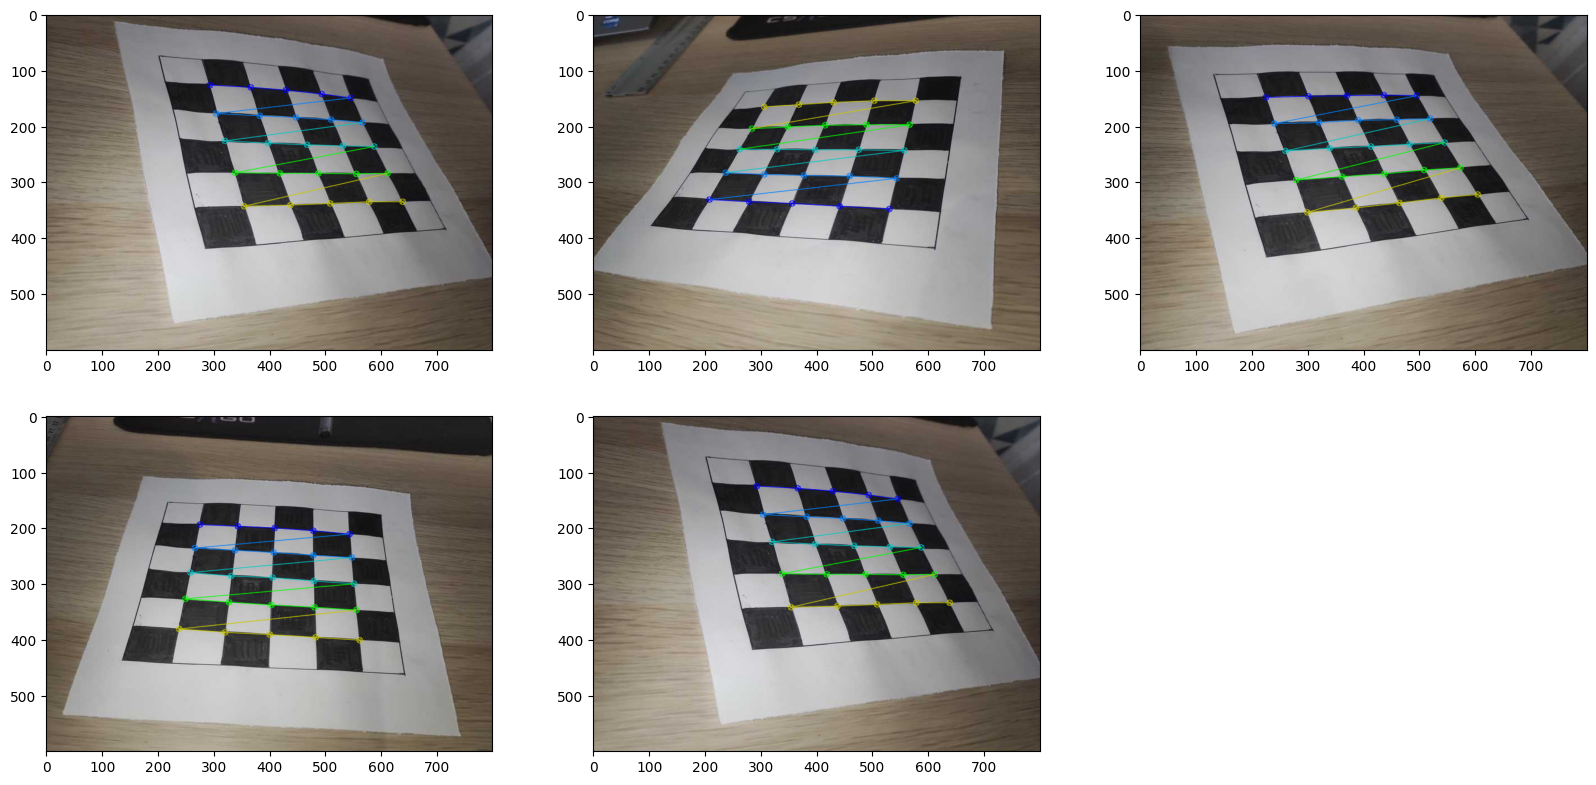

In [13]:
plt.figure(figsize=figsize)

for i, fn in enumerate(img_names):
    print("processing %s... " % fn)
    imgBGR = cv2.imread(fn)

    if imgBGR is None:
        print("Failed to load", fn)
        continue

    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
    print(f"Expected size: {w} x {h}")
    print(f"Actual size: {img.shape[1]} x {img.shape[0]}")

    assert (
        w == img.shape[1] and h == img.shape[0]
    ), f"size: {img.shape[1]} x {img.shape[0]}"
    found, corners = cv2.findChessboardCorners(img, pattern_size)

    if not found:
        print("chessboard not found")
        continue

    if i < 12:
        img_w_corners = cv2.drawChessboardCorners(imgRGB, pattern_size, corners, found)
        plt.subplot(4, 3, i + 1)
        plt.imshow(img_w_corners)

    print(f"{fn}... OK")
    img_points.append(corners.reshape(-1, 2))
    obj_points.append(pattern_points)


plt.show()

In [14]:
rms, camera_matrix, dist_coefs, _rvecs, _tvecs = cv2.calibrateCamera(
    obj_points, img_points, (w, h), None, None
)

print("\nRMS:", rms)
print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())


RMS: 1.6399464723220014
camera matrix:
 [[796.92546013   0.         392.51734909]
 [  0.         596.10334063 310.60911233]
 [  0.           0.           1.        ]]
distortion coefficients:  [-3.52178083e-01  8.22453885e+00 -1.57525980e-02  7.18632130e-03
 -4.76969564e+01]


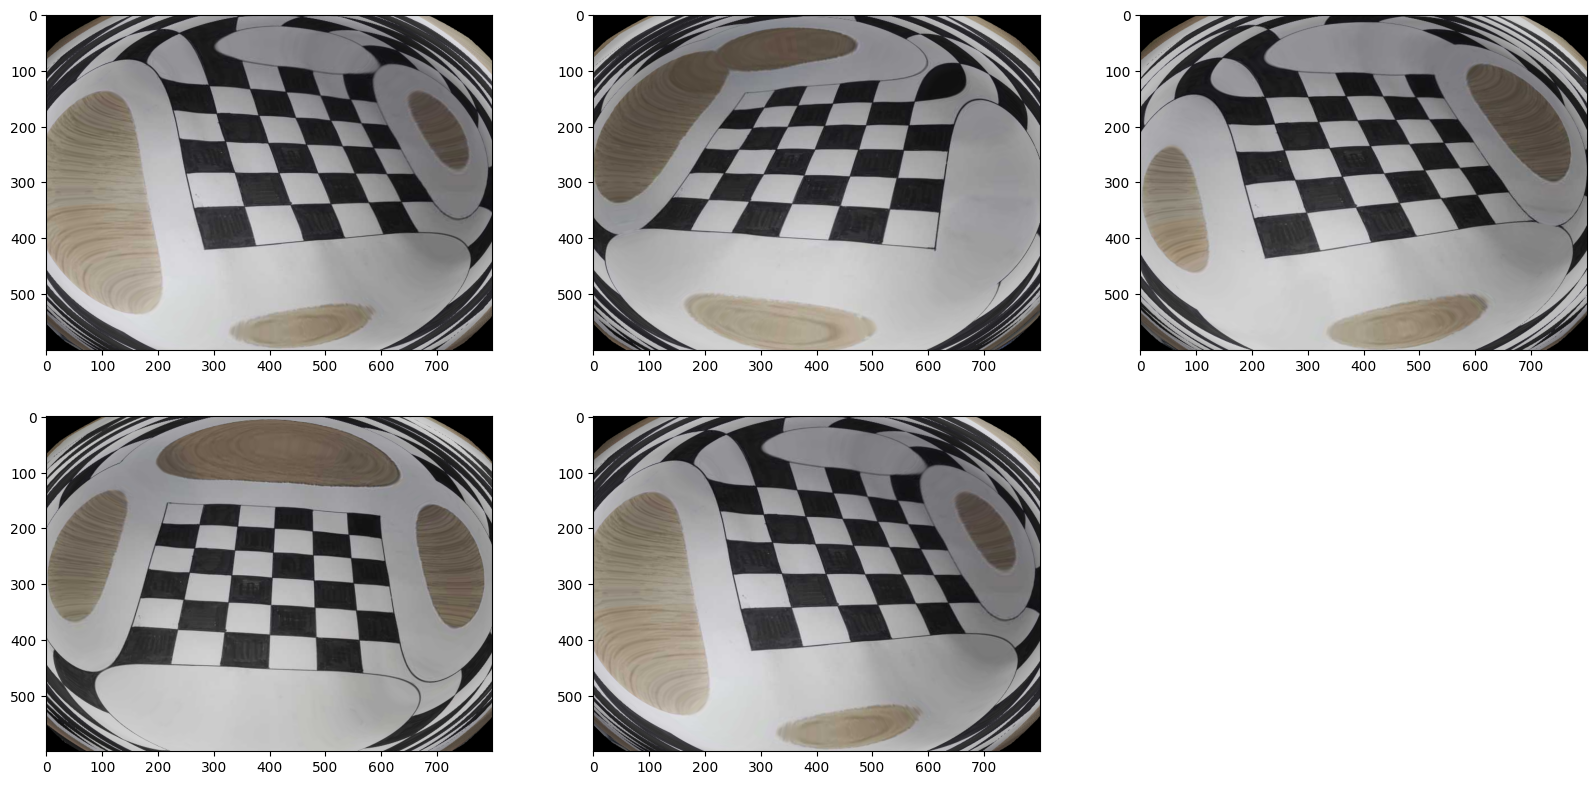

Done


In [15]:
# undistort the image with the calibration
plt.figure(figsize=figsize)
for i, fn in enumerate(img_names):
    imgBGR = cv2.imread(fn)
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

    dst = cv2.undistort(imgRGB, camera_matrix, dist_coefs)

    if i < 12:
        plt.subplot(4, 3, i + 1)
        plt.imshow(dst)

plt.show()
print("Done")



In [16]:
import random
def visualize_points_on_image(image_path, points, title="Points on Image"):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return
    
    # Convert BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    
    # Plot each point
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    for i, point in enumerate(points):
        # Plot the point
        plt.plot(point[0], point[1], 'o', 
                 color=colors[i % len(colors)], 
                 markersize=10, 
                 markerfacecolor='none', 
                 markeredgewidth=2)
        
        # Annotate the point
        plt.annotate(f'Point {i+1}\n({point[0]}, {point[1]})', 
                     (point[0], point[1]), 
                     xytext=(10, 10), 
                     textcoords='offset points',
                     fontsize=10,
                     bbox=dict(boxstyle='round,pad=0.2', 
                               fc='yellow', 
                               alpha=0.3))
    
    # If more than one point, draw lines between consecutive points
    if len(points) > 1:
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        plt.plot(x_coords, y_coords, 'r--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def generate_random_points(image_path, num_points=5):
  
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    
    height, width = img.shape[:2]
    
    # Generate random points within image boundaries
    random_points = [
        (random.randint(0, width-1), random.randint(0, height-1)) 
        for _ in range(num_points)
    ]
    
    return random_points

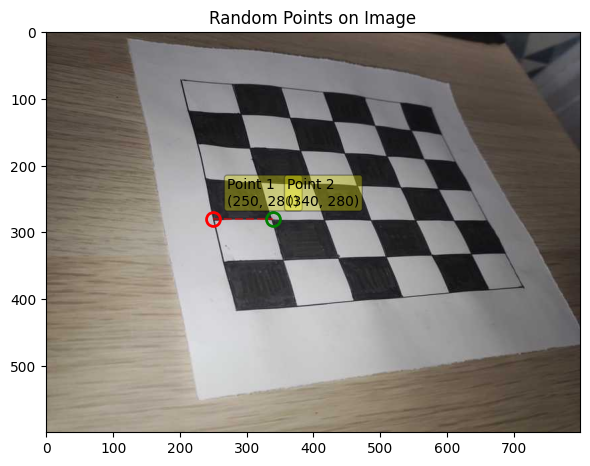

Real-world distance between the points: 2.279841348393327


In [17]:

# Define the pixel coordinates of the two points (replace with your actual points)
image = "compressed_images/test.jpg"
# points = generate_random_points(image, num_points=2)
# # Replace x2, y2 with actual pixel coordinates
points = [(250, 280), (340, 280)]
point1 = points[0]  # Replace x1, y1 with actual pixel coordinates
point2 = points[1]

visualize_points_on_image(image, points, title="Random Points on Image")
points = np.array([[point1], [point2]], dtype=np.float32)


undistorted_points = cv2.undistortPoints(points, camera_matrix, dist_coefs, P=camera_matrix)

# Extract individual points
point1_undistorted = undistorted_points[0][0]
point2_undistorted = undistorted_points[1][0]

# Convert to camera coordinates
camera_coords_1 = np.dot(np.linalg.inv(camera_matrix), np.append(point1_undistorted, [1]))
camera_coords_2 = np.dot(np.linalg.inv(camera_matrix), np.append(point2_undistorted, [1]))

# Assume a constant Z-coordinate or use known depths
z_constant = 20  # Replace with actual depth if known
camera_coords_1 *= z_constant / camera_coords_1[2]
camera_coords_2 *= z_constant / camera_coords_2[2]

# Calculate the Euclidean distance
distance = np.linalg.norm(camera_coords_1 - camera_coords_2)
print(f"Real-world distance between the points: {distance}")
